## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-006-008-Hierarchical-clustering-01

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

from time import time
import numpy as np
import os
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import datasets

np.random.seed(0)

In [2]:
from sklearn import manifold

In [3]:
from sklearn.cluster import AgglomerativeClustering

In [4]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

In [5]:
def nudge_images(X, y):
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

# Visualize the clustering

In [6]:
def save_figure(fig, fignumber):
    imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
    print(imagepath)
    figname='Chapter-006-Example-008-%02d.jpg' % (fignumber)
    print(figname)

    if not os.path.exists(imagepath):
        os.makedirs(imagepath)
        
    imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
    fig.savefig(imagename, bbox_inches='tight')  

In [7]:
def plot_clustering(X_red, labels, fignumber, title):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    fig=plt.figure(figsize=(10, 10))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 10})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    save_figure(fig, fignumber)

# Embedding Data Set - 2D embedding of the digits dataset

In [8]:
t0 = time()
print("Computing embedding")

X_emb_manifold = manifold.SpectralEmbedding(n_components=2, 
                                            random_state=1968, 
                                            n_jobs=-1
                                         )

print(X_emb_manifold.get_params(deep=True))

X_emb=X_emb_manifold.fit_transform(X)
print("Done after \t%.2fs" % (time() - t0))

Computing embedding
{'affinity': 'nearest_neighbors', 'eigen_solver': None, 'gamma': None, 'n_components': 2, 'n_jobs': -1, 'n_neighbors': None, 'random_state': 1968}
Done after 	26.09s


In [9]:
print('Agglomerative Clustering')
print('-'*80)

Agglomerative Clustering
--------------------------------------------------------------------------------


# Clustering: Linkage using Ward and affinity using euclidean

euclidean - ward :	1.01s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-01.jpg


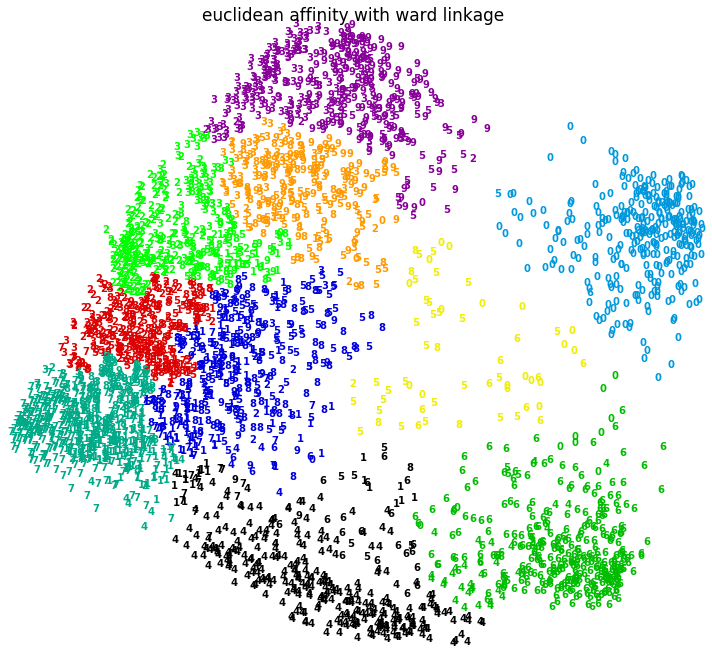

In [10]:
linkage = 'ward'
affinity = 'euclidean'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage,
                                     compute_full_tree=True,
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 1, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

# Clustering: Linkage using average and affinity using euclidean

euclidean - average :	0.95s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-02.jpg


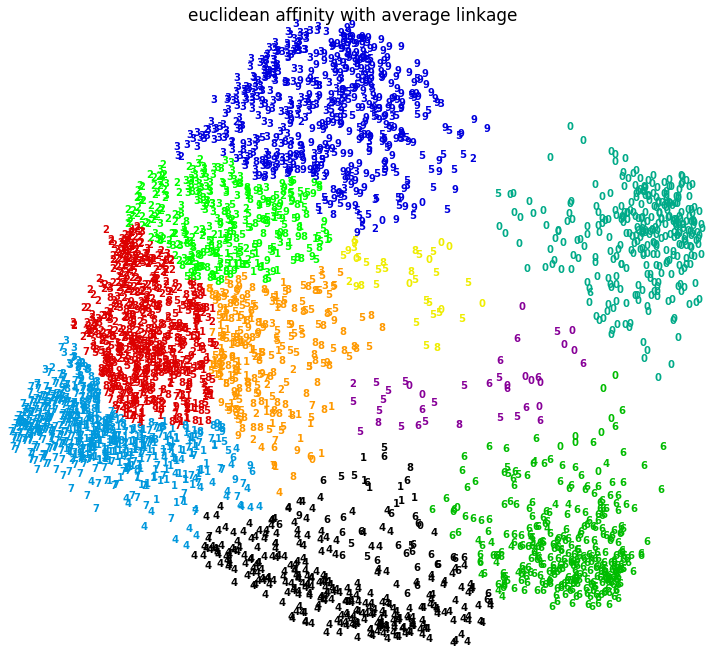

In [11]:
linkage = 'average'
affinity = 'euclidean'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage, 
                                     compute_full_tree=True,
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 2, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

# Clustering: Linkage using average and affinity using cosine

cosine - average :	0.89s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-03.jpg


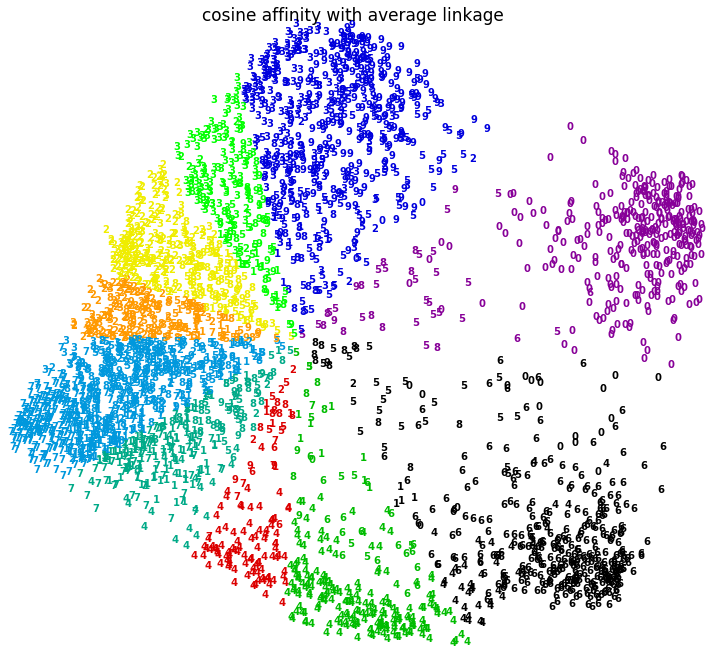

In [12]:
linkage = 'average'
affinity = 'cosine'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage, 
                                     compute_full_tree=True,
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 3, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

# Clustering: Linkage using average and affinity using manhattan

manhattan - average :	0.95s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-04.jpg


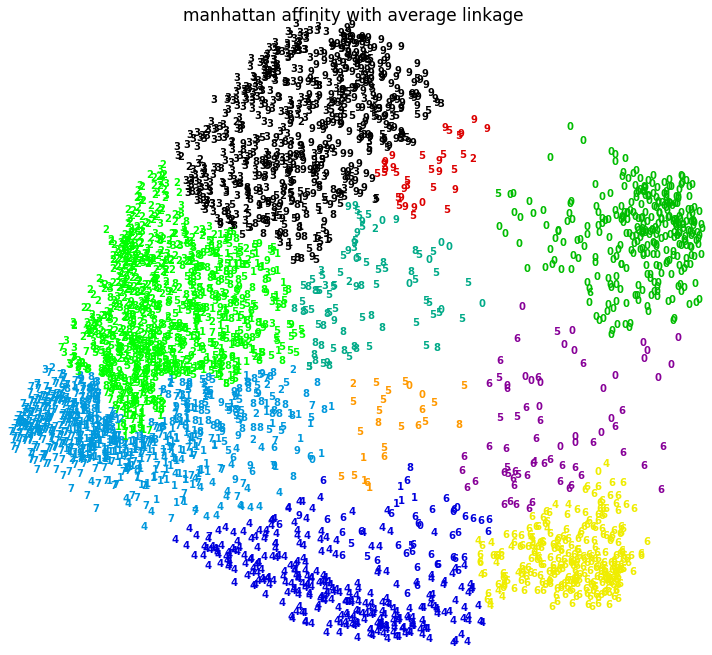

In [13]:
linkage = 'average'
affinity = 'manhattan'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage,
                                     compute_full_tree=True, 
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 4, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

# Clustering: Linkage using average and affinity using cosine

cosine - average :	0.82s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-05.jpg


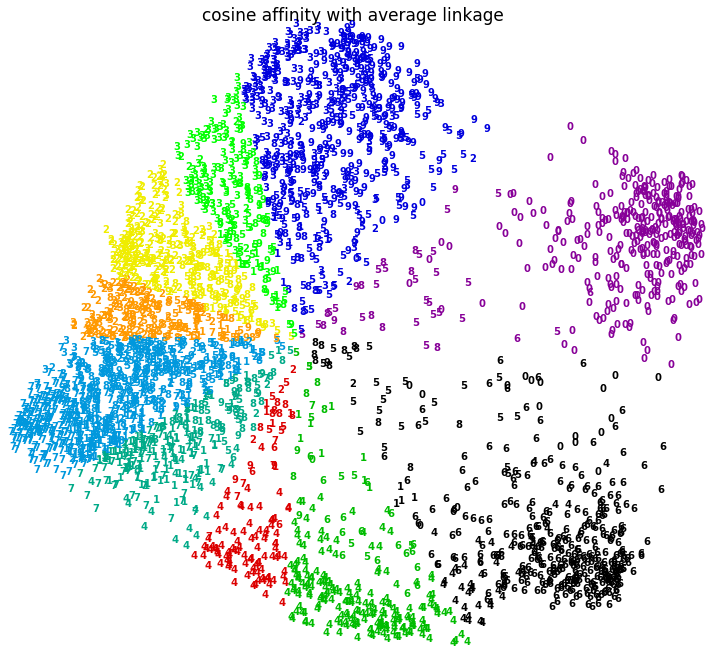

In [14]:
linkage = 'average'
affinity = 'cosine'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage, 
                                     compute_full_tree=True,
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 5, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

# Clustering: Linkage using complete and affinity using euclidean

euclidean - complete :	0.92s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-06.jpg


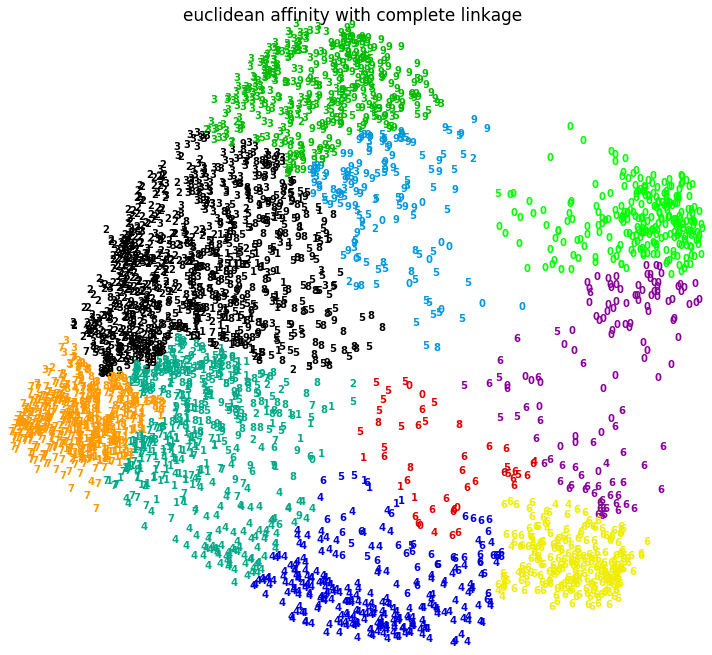

In [15]:
linkage = 'complete'
affinity = 'euclidean'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage, 
                                     compute_full_tree=True,
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 6, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

# Clustering: Linkage using complete and affinity using manhattan

manhattan - complete :	0.87s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-07.jpg


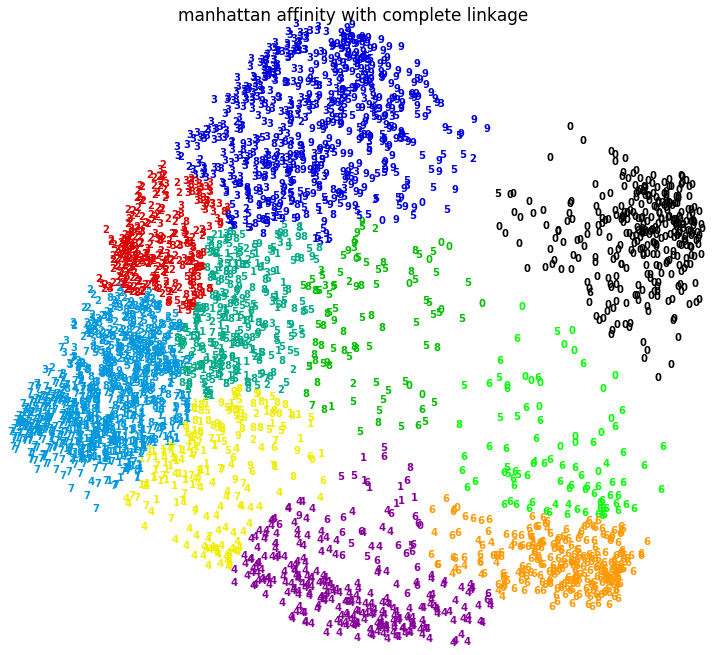

In [16]:
linkage = 'complete'
affinity = 'manhattan'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage, 
                                     compute_full_tree=True,
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 7, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

# Clustering: Linkage using complete and affinity using cosine

cosine - complete :	0.82s
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06
Chapter-006-Example-008-08.jpg


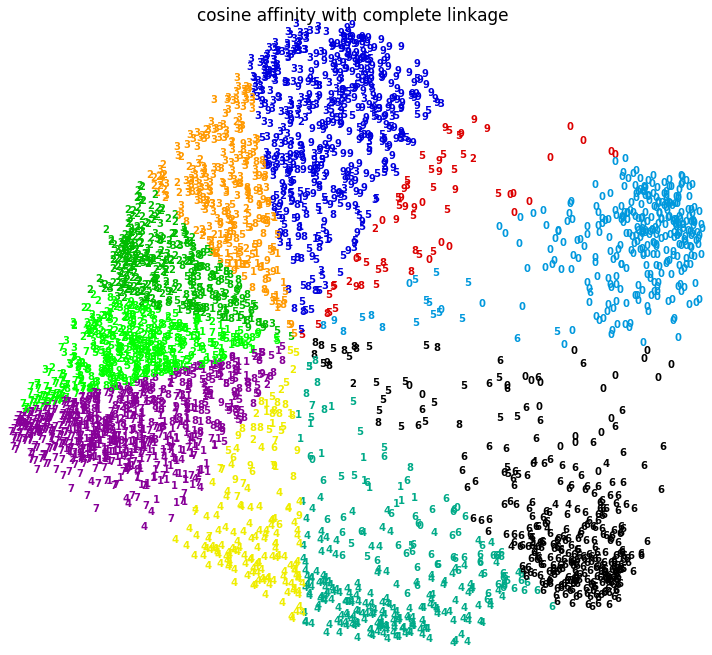

In [17]:
linkage = 'complete'
affinity = 'cosine'
clustering = AgglomerativeClustering(affinity=affinity, 
                                     linkage=linkage, 
                                     compute_full_tree=True,
                                     n_clusters=10
                                    )
t0 = time()
clustering.fit(X_emb)
print("%s - %s :\t%.2fs" % (affinity, linkage, time() - t0))

plot_clustering(X_emb, clustering.labels_, 8, "%s affinity with %s linkage" % (affinity, linkage))
plt.show()

## Done

In [18]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-20 16:05:09.902930
